<a href="https://colab.research.google.com/github/2403a52030-sketch/NLP-LAB/blob/main/NLP_Lab_11_2403a52030.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # Import the pandas library for data manipulation

try:
    # Attempt to read the CSV file into a pandas DataFrame
    df_news = pd.read_csv('/content/news.csv')
    print("'/content/news.csv' loaded successfully!") # Confirm successful loading
    display(df_news.head()) # Display the first few rows of the DataFrame
except FileNotFoundError:
    # Handle the case where the file is not found
    print("Error: '/content/news.csv' not found. This should not happen if the file is listed in the kernel files.")
except Exception as e:
    # Handle any other exceptions during file loading
    print(f"An error occurred while loading '/content/news.csv': {e}")

'/content/news.csv' loaded successfully!


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
# Numerical operations
import numpy as np # Import NumPy for numerical computations

# Data handling and analysis
import pandas as pd # Import Pandas for data manipulation and analysis

# Text preprocessing
import string # Import string module for string operations
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS # Import English stop words for text cleaning

# Feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer # Import TF-IDF Vectorizer to convert text to numerical features

# Model selection and training
from sklearn.model_selection import train_test_split # Import train_test_split for splitting data into training and testing sets
from sklearn.naive_bayes import MultinomialNB # Import Multinomial Naive Bayes classifier

# Model evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score # Import accuracy, precision, and recall metrics
from sklearn.metrics import f1_score, confusion_matrix, classification_report # Import F1-score, confusion matrix, and classification report

# Visualization (optional)
import matplotlib.pyplot as plt # Import Matplotlib for plotting
import seaborn as sns # Import Seaborn for enhanced data visualizations

In [ ]:
# Upload dataset manually in Colab (sms_spam.csv or SMSSpamCollection)
from google.colab import files # Import files module from google.colab to handle file uploads
uploaded = files.upload() # Prompt user to upload files and store the result

Saving news.csv to news (2).csv


In [ ]:
# Function to clean text
def clean_text(text):
    # Convert text to lowercase to ensure consistency
    text = text.lower()

    # Remove punctuation from the text using string.punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Split the text into words
    words = text.split()
    # Remove common English stop words (e.g., 'the', 'a', 'is')
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]

    # Join the cleaned words back into a single string
    return " ".join(words)

# Apply the clean_text function to the 'text' column of the df_news DataFrame
# and store the results in a new 'clean_message' column
df_news['clean_message'] = df_news['text'].apply(clean_text)

# Display the 'text' and 'clean_message' columns for the first few rows
df_news[['text', 'clean_message']].head()

,text,clean_message
0,"Daniel Greenfield, a Shillman Journalism Fello...",daniel greenfield shillman journalism fellow f...
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,google pinterest digg linkedin reddit stumbleu...
2,U.S. Secretary of State John F. Kerry said Mon...,secretary state john f kerry said monday stop ...
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",— kaydee king kaydeeking november 9 2016 lesso...
4,It's primary day in New York and front-runners...,primary day new york frontrunners hillary clin...


In [ ]:
# Initialize the TF-IDF Vectorizer with a maximum of 3000 features (words)
vectorizer = TfidfVectorizer(max_features=3000)

# Convert the 'clean_message' text data into a numerical TF-IDF feature matrix
X = vectorizer.fit_transform(df_news['clean_message'])

# Map the 'label' column ('FAKE'/'REAL') to numerical target labels (0/1)
y = df_news['label'].map({'FAKE': 0, 'REAL': 1})

# Print the shape of the resulting feature matrix (number of samples, number of features)
print("Feature matrix shape:", X.shape)

# Display a sample of the feature names (words) learned by the TF-IDF vectorizer
print("\nSample feature names:")
print(vectorizer.get_feature_names_out()[:20])

Feature matrix shape: (6335, 3000)

Sample feature names:
['10' '100' '1000' '10000' '11' '12' '13' '14' '15' '16' '17' '18' '19'
 '1980s' '1990s' '1992' '20' '200' '2000' '2001']


In [ ]:
# Split the dataset into training and testing sets
# X: features, y: target labels
# test_size=0.2 means 20% of the data will be used for testing
# random_state=42 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Print the number of samples in the training set
print("Training samples:", X_train.shape[0])
# Print the number of samples in the testing set
print("Testing samples:", X_test.shape[0])

Training samples: 5068
Testing samples: 1267


In [ ]:
# Initialize the Multinomial Naive Bayes classifier
nb_model = MultinomialNB()

# Train the Naive Bayes model using the training features (X_train) and labels (y_train)
nb_model.fit(X_train, y_train)

# Display the parameters of the trained model
print("Model parameters:", nb_model.get_params())

Model parameters: {'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}


In [ ]:
# Make predictions on the test set using the trained Naive Bayes model
y_pred = nb_model.predict(X_test)

# Calculate various evaluation metrics
accuracy = accuracy_score(y_test, y_pred) # Proportion of correctly classified samples
precision = precision_score(y_test, y_pred) # Proportion of true positive predictions among all positive predictions
recall = recall_score(y_test, y_pred) # Proportion of true positive predictions among all actual positives
f1 = f1_score(y_test, y_pred) # Harmonic mean of precision and recall

# Print the calculated evaluation metrics
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1-score :", f1)

Accuracy : 0.8863456985003947
Precision: 0.9064039408866995
Recall   : 0.863849765258216
F1-score : 0.8846153846153846


In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=9000000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
# Set pos_label to 0, as 'FAKE' was mapped to 0
precision = precision_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred, pos_label=0)
f1 = f1_score(y_test, y_pred, pos_label=0)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n")
# Specify target names for better readability in the classification report
print(classification_report(y_test, y_pred, target_names=['FAKE', 'REAL']))

Accuracy: 0.914759273875296
Precision: 0.9113924050632911
Recall: 0.9171974522292994
F1-Score: 0.9142857142857143

Confusion Matrix:
 [[576  52]
 [ 56 583]]

Classification Report:

              precision    recall  f1-score   support

        FAKE       0.91      0.92      0.91       628
        REAL       0.92      0.91      0.92       639

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267



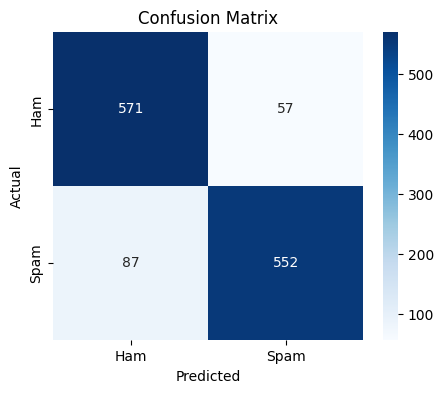

In [ ]:
# Compute the confusion matrix to evaluate the classification model's performance
cm = confusion_matrix(y_test, y_pred)

# Create a figure for the heatmap visualization with a specified size
plt.figure(figsize=(5,4))
# Generate a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', # annot=True to show values, fmt='d' for integer format, cmap for color scheme
            xticklabels=['Ham', 'Spam'], # Labels for the predicted classes on the x-axis
            yticklabels=['Ham', 'Spam']) # Labels for the actual classes on the y-axis
plt.xlabel("Predicted") # Label for the x-axis
plt.ylabel("Actual") # Label for the y-axis
plt.title("Confusion Matrix") # Title of the plot
plt.show() # Display the plot